<a href="https://colab.research.google.com/github/darapanenichandana/my-app/blob/main/music%20data%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 Rows of the Dataset:
              artist                    song  duration_ms  explicit  year  \
0  0  Britney Spears  Oops!...I Did It Again       211160     False  2000   
1  1       blink-182    All The Small Things       167066     False  1999   
2  2      Faith Hill                 Breathe       250546     False  1999   
3  3        Bon Jovi            It's My Life       224493     False  2000   
4  4          *NSYNC             Bye Bye Bye       200560     False  2000   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          30         0.751   0.834    1    -5.444     0       0.0437   
1          40         0.434   0.897    0    -4.918     1       0.0488   
2          50         0.529   0.496    7    -9.007     1       0.0290   
3          60         0.551   0.913    0    -4.063     0       0.0466   
4          65         0.614   0.928    8    -4.806     0       0.0516   

   acousticness  instrumentalness  liveness  valence    tempo        

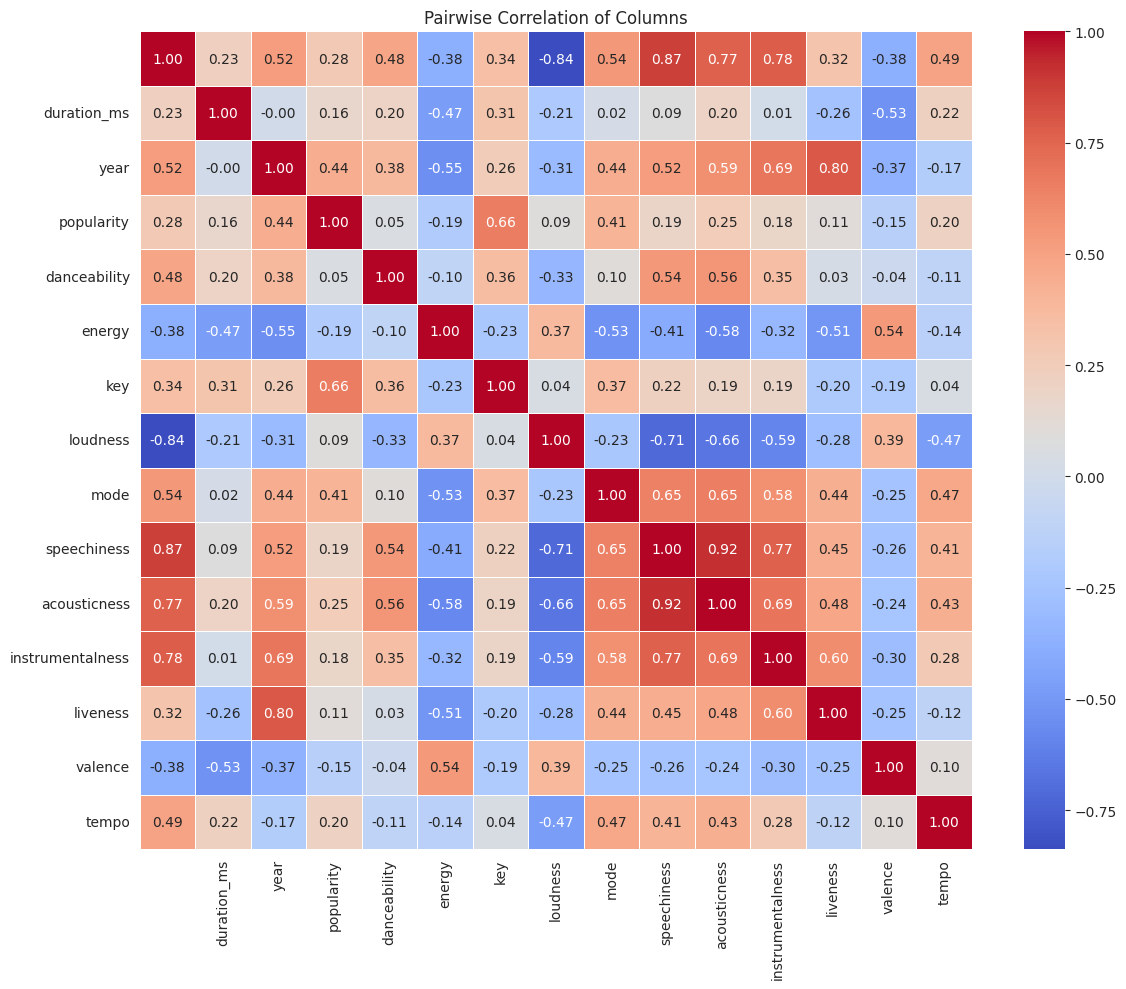

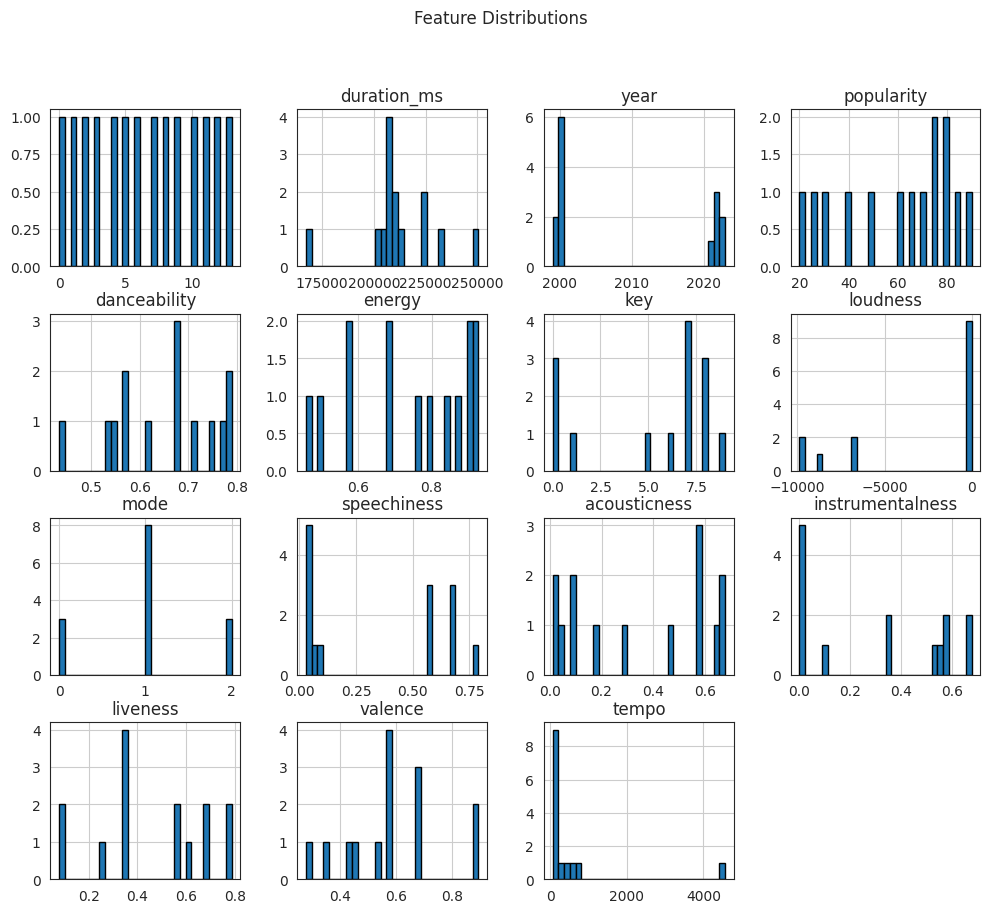

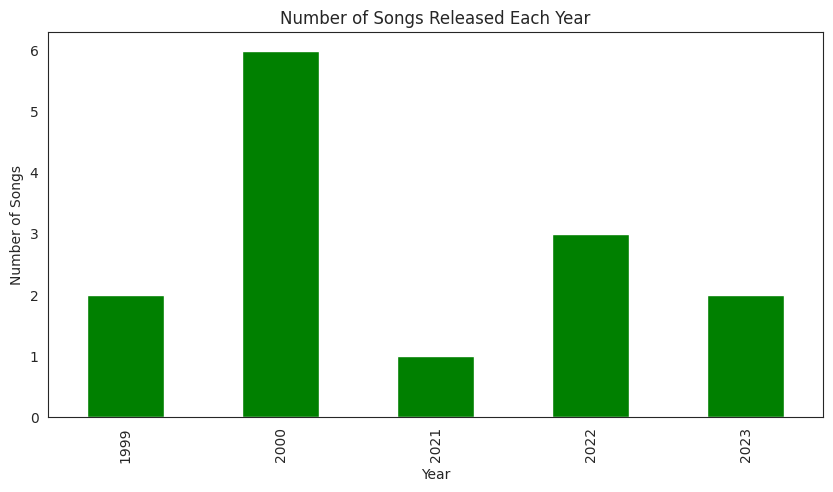

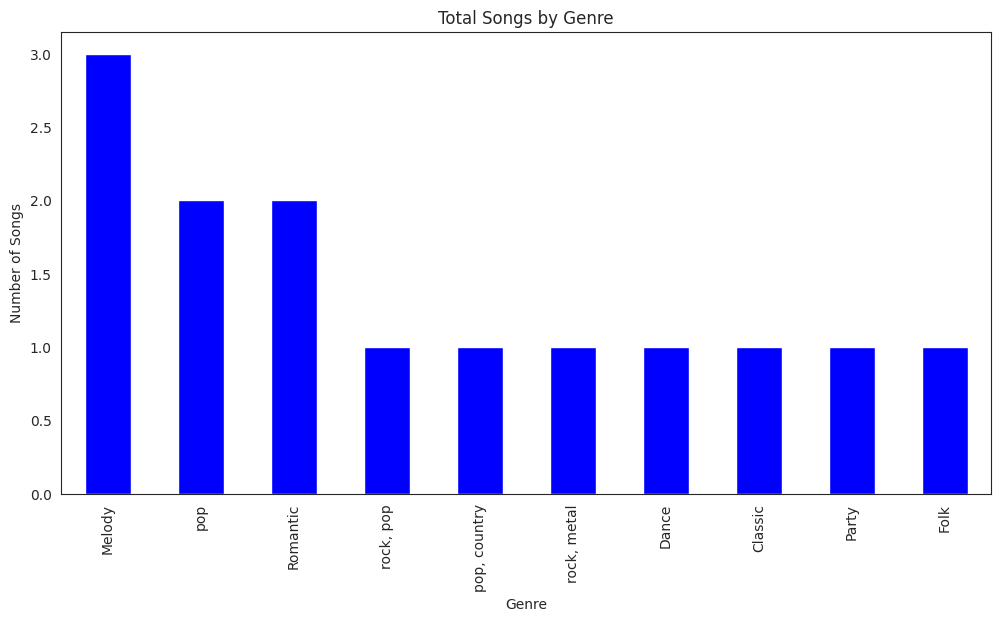

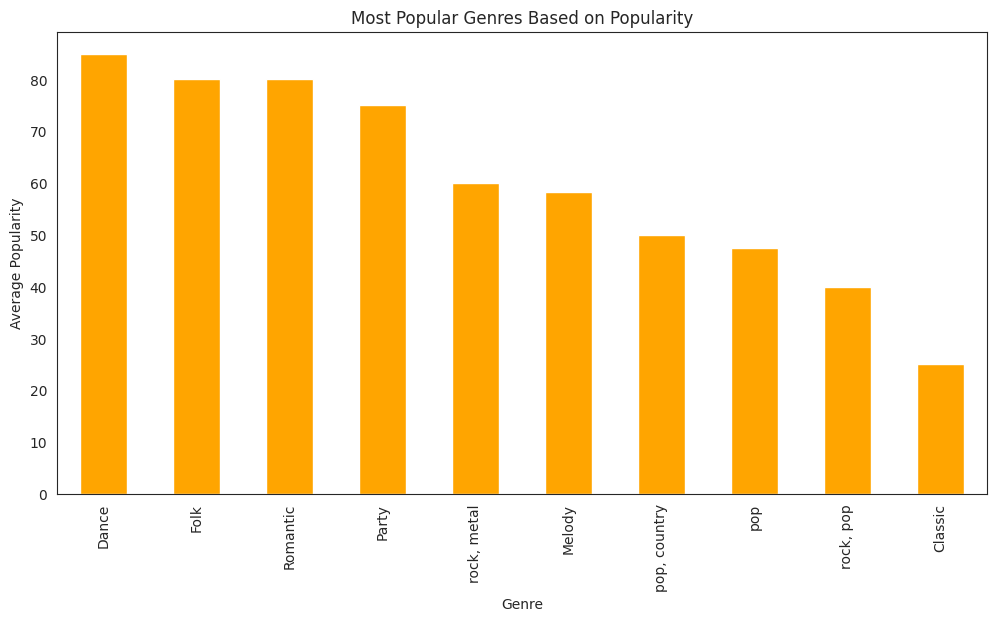

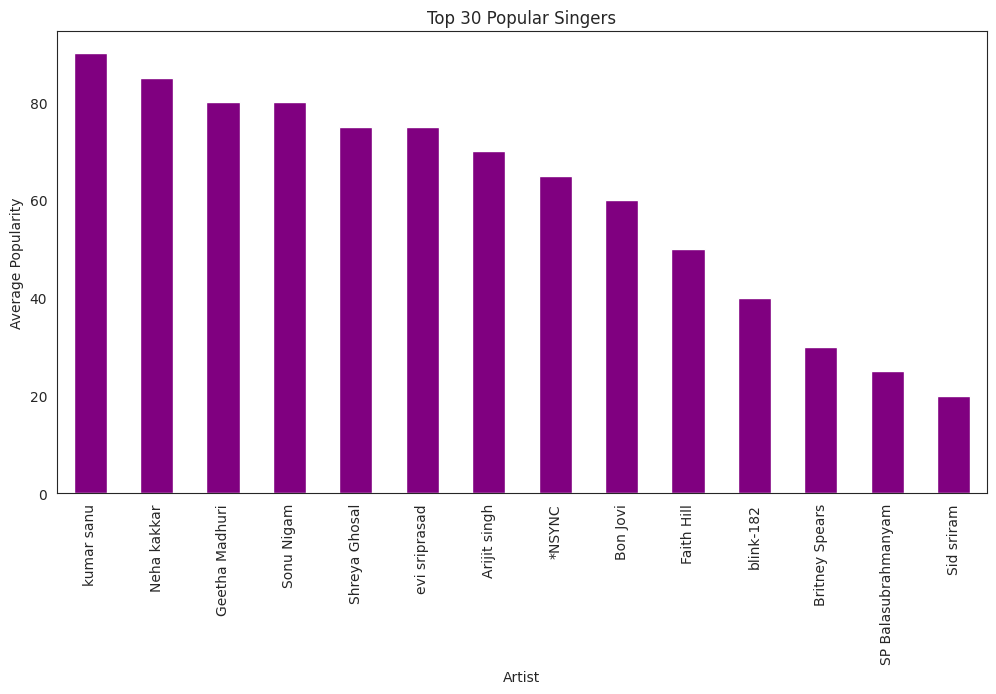

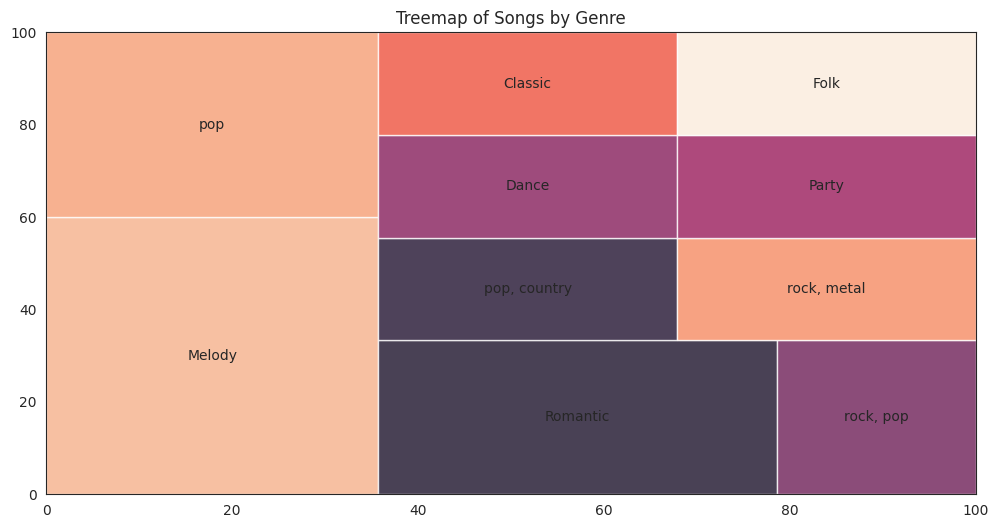

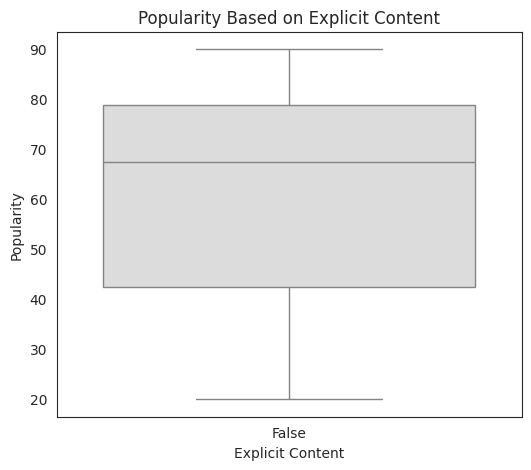

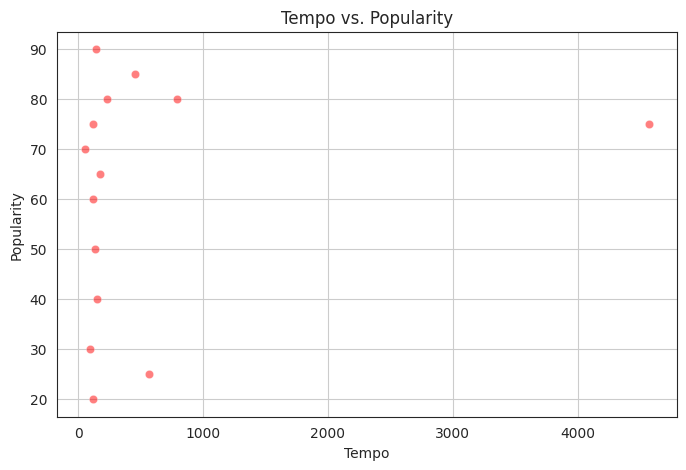

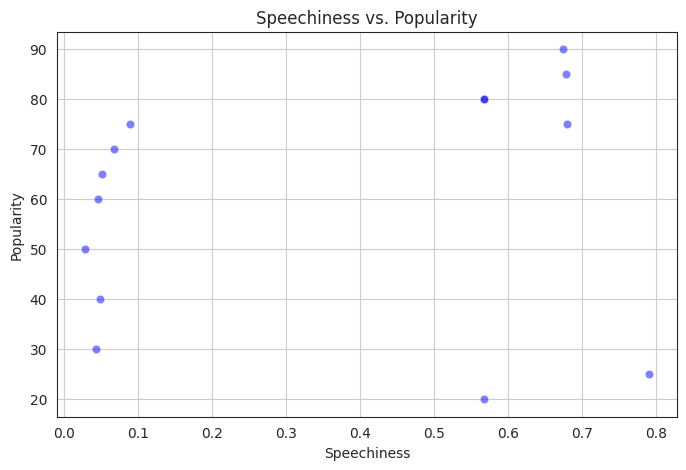

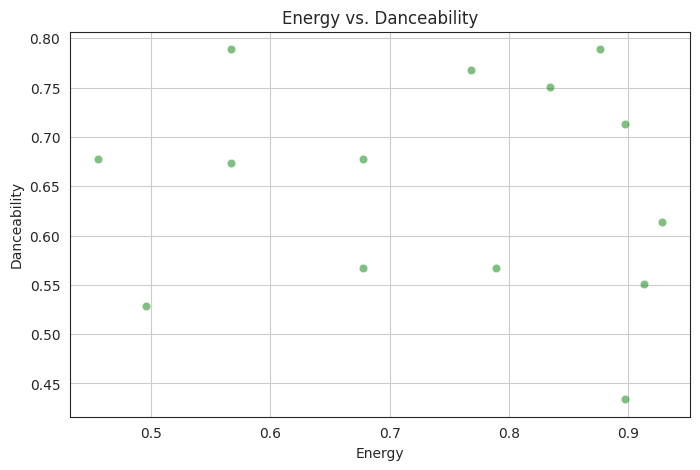

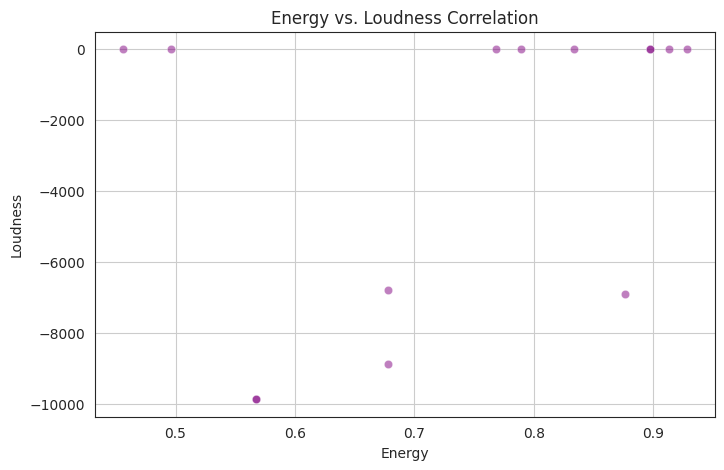

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import time
from google.colab import files
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px



warnings.filterwarnings('ignore')


file_path = '/content/singersontable.csv'
df = pd.read_csv(file_path)




print("First 5 Rows of the Dataset:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nMissing Values in Each Column:")
print(df.isnull().sum())

print("\nDuplicate Values Count:")
print(df.duplicated().sum())


df.drop_duplicates(inplace=True)

print("\nDataset Shape After Removing Duplicates:", df.shape)

print("\nSummary Statistics:")
print(df.describe())

df.fillna(0, inplace=True)


plt.figure(figsize=(12, 10))
sns.set_style("white")
numeric_df = df.select_dtypes(include=['number'])
if not numeric_df.empty:
    corr_matrix = numeric_df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Pairwise Correlation of Columns')
    plt.tight_layout()
    plt.savefig("correlation_heatmap.png", facecolor='white')
    plt.show()


df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()


plt.figure(figsize=(10, 5))
df["year"].value_counts().sort_index().plot(kind='bar', color='green')
plt.title("Number of Songs Released Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Songs")
plt.show()


plt.figure(figsize=(12, 6))
df["genre"].value_counts().plot(kind="bar", color="blue")
plt.title("Total Songs by Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Songs")
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(12, 6))
df.groupby("genre")["popularity"].mean().sort_values(ascending=False).plot(kind="bar", color="orange")
plt.title("Most Popular Genres Based on Popularity")
plt.xlabel("Genre")
plt.ylabel("Average Popularity")
plt.xticks(rotation=90)
plt.show()




top_singers = df.groupby("artist")["popularity"].mean().sort_values(ascending=False).head(30)
plt.figure(figsize=(12, 6))
top_singers.plot(kind="bar", color="purple")
plt.title("Top 30 Popular Singers")
plt.xlabel("Artist")
plt.ylabel("Average Popularity")
plt.xticks(rotation=90)
plt.show()



plt.figure(figsize=(12, 6))
squarify.plot(sizes=df["genre"].value_counts().values, label=df["genre"].value_counts().index, alpha=0.8)
plt.title("Treemap of Songs by Genre")
plt.show()

plt.figure(figsize=(6, 5))
sns.boxplot(x=df["explicit"], y=df["popularity"], palette="coolwarm")
plt.title("Popularity Based on Explicit Content")
plt.xlabel("Explicit Content")
plt.ylabel("Popularity")
plt.show()


plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["tempo"], y=df["popularity"], alpha=0.5, color="red")
plt.title("Tempo vs. Popularity")
plt.xlabel("Tempo")
plt.ylabel("Popularity")
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["speechiness"], y=df["popularity"], alpha=0.5, color="blue")
plt.title("Speechiness vs. Popularity")
plt.xlabel("Speechiness")
plt.ylabel("Popularity")
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["energy"], y=df["danceability"], alpha=0.5, color="green")
plt.title("Energy vs. Danceability")
plt.xlabel("Energy")
plt.ylabel("Danceability")
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["energy"], y=df["loudness"], alpha=0.5, color="purple")
plt.title("Energy vs. Loudness Correlation")
plt.xlabel("Energy")
plt.ylabel("Loudness")
plt.grid(True)
plt.show()
